<a href="https://colab.research.google.com/github/bsureshkrishna/qlsc600_2025/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I don't know how to get rid of the second graph at the bottom.

You should experiment with different waves instead of the square wave. You can for example try different sine-waves to see why the gamma is a low-pass filter.

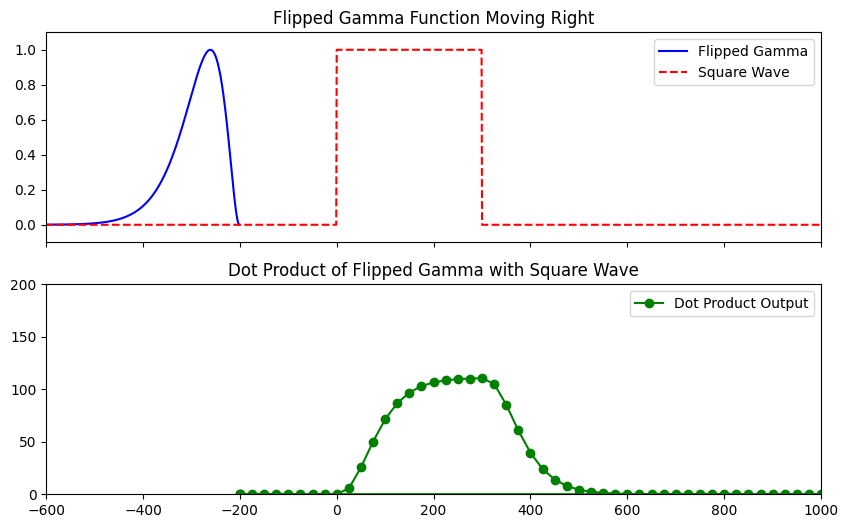

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Define time axis
dt = 1  # 1 ms step for defining time axis
step_size = 25  # Move every 10 ms in animation
t = np.arange(-1000, 1000, dt)  # 2 s total time

# Define the gamma function (approximation)
def gamma_function(t, tau=30, n=2):
    """Gamma function: (t/tau)^n * exp(-t/tau), normalized."""
    t = np.maximum(t, 1e-3)  # Avoid division by zero
    return (t/tau)**n * np.exp(-t/tau)

# Generate gamma function
gamma_width = 400  # 400 ms
gamma_t = np.arange(0, gamma_width, dt)
gamma = gamma_function(gamma_t)
gamma = gamma / np.max(gamma)  # Normalize

# Generate left-right flipped gamma
gamma_flipped = gamma[::-1]

# Generate square wave: 0 everywhere except from 0 to 100 ms
square_wave = np.zeros_like(t)
square_wave[(t >= 0) & (t < 300)] = 1  # Set values to 1 in the desired range

# Animation parameters
start_pos = -600
end_pos = 1000
positions = np.arange(start_pos, end_pos, step_size)  # Step every 10 ms

# Initialize figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Set up plots
line1, = axs[0].plot([], [], label="Flipped Gamma", color='blue')
axs[0].plot(t, square_wave, label="Square Wave", linestyle="--", color='red')
axs[0].legend()
axs[0].set_title("Flipped Gamma Function Moving Right")
axs[0].set_xlim(t[0], t[-1])
axs[0].set_ylim(-0.1, 1.1)

line2, = axs[1].plot([], [], label="Dot Product Output", marker="o", color='green')
axs[1].set_title("Dot Product of Flipped Gamma with Square Wave")
axs[1].set_xlim(start_pos, end_pos)
axs[1].set_ylim(-0.1, 200.1)
axs[1].legend()

dot_product_values = []
dot_product_x = []

# Update function for animation
def update(frame):
    current_pos = positions[frame]
    shifted_t = gamma_t + current_pos  # Shift gamma function

    # Ensure shifted gamma only plots within valid time range
    valid_idx = (shifted_t >= t[0]) & (shifted_t <= t[-1])
    gamma_x = shifted_t[valid_idx]
    gamma_y = gamma_flipped[valid_idx]

    line1.set_data(gamma_x, gamma_y)

    # Compute dot product using element-wise multiplication
    overlap_idx = (t >= current_pos) & (t < current_pos + gamma_width)

    if np.any(overlap_idx):  # Ensure there is overlap
        overlap_gamma = gamma_flipped[:np.sum(overlap_idx)]
        overlap_square_wave = square_wave[overlap_idx]

        if overlap_gamma.shape == overlap_square_wave.shape:  # Ensure shapes match
            dot_product = np.sum(overlap_gamma * overlap_square_wave)
        else:
            dot_product = 0
    else:
        dot_product = 0

    dot_product_x.append(current_pos+gamma_width)
    dot_product_values.append(dot_product)
    line2.set_data(dot_product_x, dot_product_values)

    return line1, line2

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(positions), interval=50, blit=False)  # 50ms for smoother animation

# Display animation in Colab
HTML(ani.to_jshtml())
